In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
data=pd.read_csv('.\Data\mnist_train.csv')

In [3]:
labels=data.label
labels=labels.values
sample_label=labels[0:15000]

In [4]:
pixel_values=data.drop('label',axis=1)
pixel_values=pixel_values.values

In [5]:
single_image=pixel_values[10]
type(single_image)

numpy.ndarray

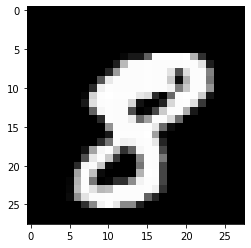

In [6]:
single_image=single_image.reshape(28,28)
plt.imshow(single_image,cmap='gray')

In [7]:
# Only a part of the original dataset taken
sample=pixel_values[0:15000]

from sklearn.preprocessing import StandardScaler
standardised_data=StandardScaler().fit_transform(sample)

In [8]:
sample_data=standardised_data.copy()

cov_mat=np.cov(sample_data.T)
cov_mat.shape

(784, 784)

In [9]:
# finding the top two eigenvalues and eigenvectors for 2D projection

from scipy.linalg import eigh
# eigenvalues will be returned in ascending order
eig_values,eig_vecs=eigh(cov_mat, eigvals=(782,783))

print("The Shape of eigenvectors = ",eig_vecs.shape)


The Shape of eigenvectors =  (784, 2)


In [10]:
eigen_pairs=[(eig_values[i],eig_vecs[:,i]) for i in range(len(eig_values))]
W=np.hstack((eigen_pairs[0][1][:,np.newaxis],eigen_pairs[1][1][:,np.newaxis]))
sample_pca=sample_data.dot(W)
sample_pca=np.hstack((sample_pca,sample_label.reshape(15000,1)))


In [11]:
pca_df=pd.DataFrame(sample_pca,columns=("1st_Comp","2nd_Comp","Label"))
pca_df.head()

,1st_Comp,2nd_Comp,Label
0,-5.558661,-5.043558,1.0
1,6.193635,19.305278,0.0
2,-1.909878,-7.678775,1.0
3,5.525748,-0.464845,4.0
4,6.366527,26.644289,0.0


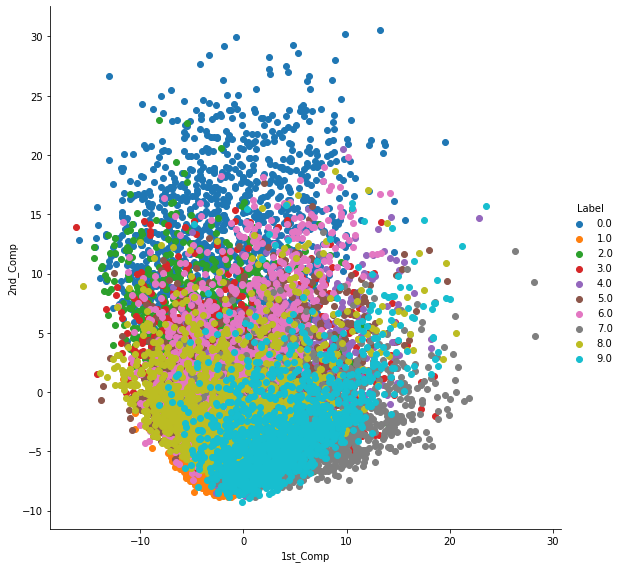

In [12]:
# Plotting the data with seaborn
grid=sns.FacetGrid(pca_df,hue="Label",height=8)
grid.map(plt.scatter,"1st_Comp","2nd_Comp").add_legend()

# PCA using sci-kit learn


In [13]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2).fit(sample_data)
pca_data2=pca.fit_transform(sample_data)

#shape of pca reduced data 
print("The shape of pca reduced data = ",pca_data2.shape)

The shape of pca reduced data =  (15000, 2)


In [14]:
pca_data2=np.hstack((pca_data2,sample_label.reshape(15000,1)))

pca_df2=pd.DataFrame(pca_data2,columns=("1st_Comp","2nd_Comp","Label"))
pca_df2.head()

,1st_Comp,2nd_Comp,Label
0,-5.043540,-5.558919,1.0
1,19.305272,6.194384,0.0
2,-7.678789,-1.909696,1.0
3,-0.464857,5.525069,4.0
4,26.644296,6.366940,0.0


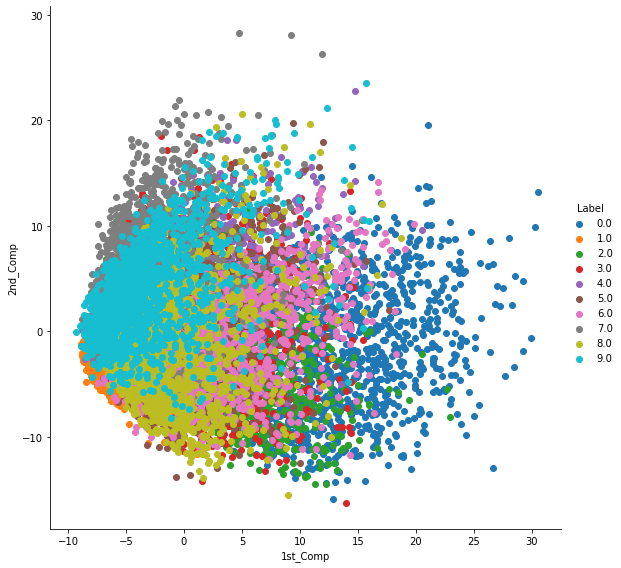

In [15]:
# Plotting the data with seaborn
grid=sns.FacetGrid(pca_df2,hue="Label",height=8)
grid.map(plt.scatter,"1st_Comp","2nd_Comp").add_legend()

In [16]:
from sklearn.decomposition import PCA
pca=PCA(n_components=784).fit(sample_data)
pca_data3=pca.fit_transform(sample_data)

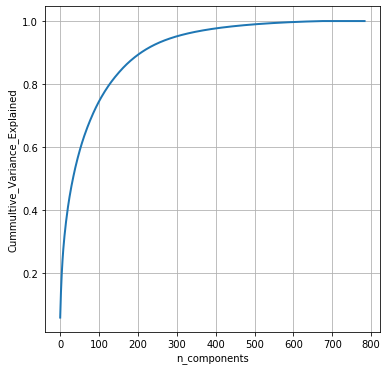

In [17]:
per_var_exp=pca.explained_variance_/np.sum(pca.explained_variance_)

cum_var_exp=np.cumsum(per_var_exp)

plt.figure(1,figsize=(6,6))
plt.clf()
plt.plot(cum_var_exp,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel("n_components")
plt.ylabel("Cummultive_Variance_Explained")
plt.show()

## Dimensionality Reduction using  t-SNE

In [18]:
# t-SNE takes a good amount of time while running on a dataset as moderately large as having 15000 points

sample_1000=sample_data[0:1000]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [34]:
from sklearn.manifold import TSNE

sample_label_1000=labels[0:1000]

model=TSNE(n_components=2,random_state=0)
tsne_data=model.fit_transform(sample_1000)
tsne_data.shape

(1000, 2)

In [35]:
tsne_data=np.hstack((tsne_data,sample_label_1000.reshape(1000,1)))
print(tsne_data.shape)
tsne_df=pd.DataFrame(tsne_data,columns=("Dim_1","Dim_2","Labels"))

(1000, 3)


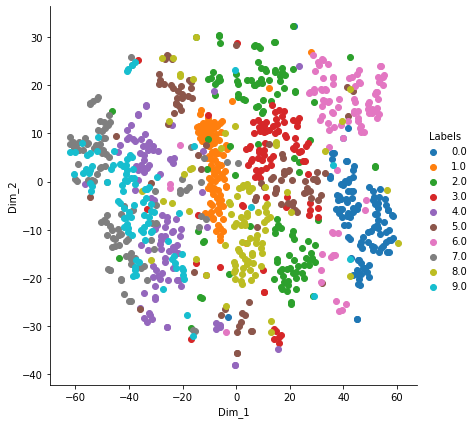

In [37]:
# Plotting the result of tSNE
sns.FacetGrid(tsne_df,hue="Labels",height=6).map(plt.scatter,"Dim_1","Dim_2").add_legend()